---
## KNN and SVM <br> <font size=3.4>Dataset:company_data.csv<br>KNN, SVM, Grid search CV used
---

In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/Ketan/Data science/Assignments/KNN/Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [4]:
#Changing the categorical variables into dummies.
df1 = pd.get_dummies(df)

#Converting the Target variable i.e. Sales into Categorical
df1['Category'] = pd.cut(df1['Sales'], 
                        bins=[0,10, np.inf], 
                        labels=['Low/Mid','High'],
                        include_lowest=True)
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Category
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,Low/Mid
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Low/Mid
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low/Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,High
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,Low/Mid
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,Low/Mid
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,Low/Mid


In [5]:
array = df1.values
X = array[:,1:15]
Y = array[:,15]

## KNN Classification
**Let's search for the best K-value using Grid Search CV algorithm**

## Grid Search for Algorithm Tuning

In [6]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

print(grid.best_score_)
print(grid.best_params_)

0.8099999999999999
{'n_neighbors': 12}


## Visualizing the Grid CV results

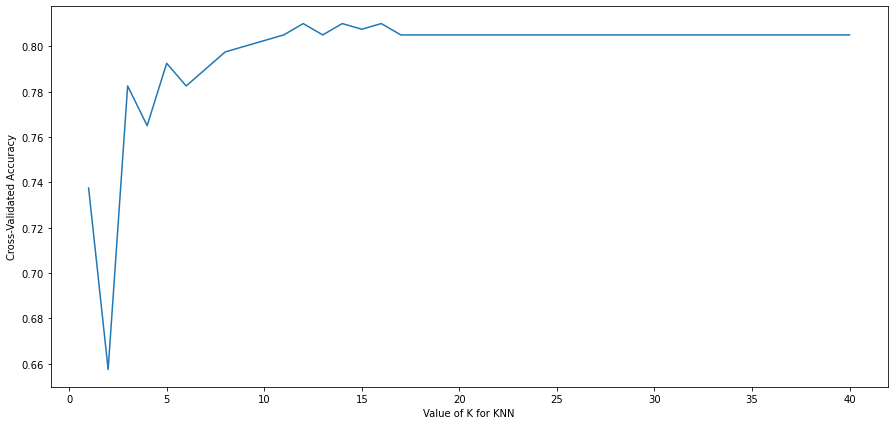

In [7]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(15,7))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Hence, K = 12 is the best value for this dataset

In [8]:
#Applying KNN 
num_folds = 10
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.8125


## SVM Classification

### Let's search for the best params using Grid Search CV

In [9]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],'C':[1,10,100,1000] },
             {'kernel':['linear'],'C':[1,10,100,1000] }]
gsv = GridSearchCV(clf,param_grid,cv=5)
gsv.fit(X_train,y_train)

gsv.best_params_ , gsv.best_score_ 

({'C': 100, 'kernel': 'linear'}, 0.9107142857142858)

In [14]:
clf1 = SVC(C=100, kernel='linear', random_state=10)
clf1.fit(X_train , y_train)
y_pred1 = clf1.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1) * 100
print("Accuracy =", acc1)
confusion_matrix(y_test, y_pred1)

Accuracy = 91.66666666666666


array([[21,  3],
       [ 7, 89]])